<a href="https://colab.research.google.com/github/mahata-lab/Tungsten-Ductile-Brittle-Temperature/blob/main/Datset_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental RT Ductility Dataset

In [ ]:
!pip install -q pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 23.2 MB/s eta 0:00:00


In [ ]:
from pymatgen.core import Element
from pymatgen.core import Composition
import pandas as pd

In [ ]:
cit = pd.read_csv('/content/MPEA_dataset.csv')
dbt = pd.read_excel('/content/DBTT_dataset.xlsx')
hea = pd.read_csv('/content/MPEA_parsed_mechanical_database.csv')

In [ ]:
# find only tungsten-containing alloys in the datasets

hea = hea[hea['Composition'].str.contains('W')]
cit = cit[cit['FORMULA'].str.contains('W')]
dbt = dbt[dbt['nominal composition'].str.contains('W')]

# see how many potential rows there are
hea.shape[0],cit.shape[0],dbt.shape[0]

(146, 121, 107)

In [ ]:
print('cit:', cit.columns)
print('dbt:', dbt.columns)
print('hea:', hea.columns)

cit: Index(['IDENTIFIER: Reference ID', 'FORMULA', 'PROPERTY: Microstructure',
       'PROPERTY: Processing method', 'PROPERTY: BCC/FCC/other',
       'PROPERTY: grain size ($\mu$m)', 'PROPERTY: Exp. Density (g/cm$^3$)',
       'PROPERTY: Calculated Density (g/cm$^3$)', 'PROPERTY: HV',
       'PROPERTY: Type of test', 'PROPERTY: Test temperature ($^\circ$C)',
       'PROPERTY: YS (MPa)', 'PROPERTY: UTS (MPa)', 'PROPERTY: Elongation (%)',
       'PROPERTY: Elongation plastic (%)',
       'PROPERTY: Exp. Young modulus (GPa)',
       'PROPERTY: Calculated Young modulus (GPa)',
       'PROPERTY: O content (wppm)', 'PROPERTY: N content (wppm)',
       'PROPERTY: C content (wppm)', 'REFERENCE: doi', 'REFERENCE: year',
       'REFERENCE: title'],
      dtype='object')
dbt: Index(['nominal composition', 'temperature_C', 'YS_Mpa', 'UTS_MPa',
       'elongation_pct', 'hardness (Hv)', 'processing', 'phases',
       'compressive strength Mpa', 'compressive yield Mpa',
       'compressive strain %'

In [ ]:
# only compression tests in cit dataset, rename the yield properties to compressive ones
cit['PROPERTY: Type of test'].value_counts()

,count
PROPERTY: Type of test,
C,92


In [ ]:
# rename columns in the three datasets to standard names

cit_col_map = {'FORMULA':'composition','PROPERTY: Microstructure':'phases','PROPERTY: HV':'hardness (HV)',
               'PROPERTY: Test temperature ($^\circ$C)':'temperature (C)',
               'PROPERTY: YS (MPa)':'compressive ys (MPa)','PROPERTY: UTS (MPa)': 'compressive strength (MPa)',
               'PROPERTY: Elongation (%)':'compressive strain (%)', 'PROPERTY: Elongation plastic (%)':'compressive elongation plastic (%)',
               'REFERENCE: doi':'doi'}

dbt_col_map = {'nominal composition':'composition','temperature_C':'temperature (C)','YS_Mpa':'ys (MPa)','UTS_MPa':'uts (MPa)',
               'elongation_pct':'elongation (%)','compressive yield Mpa': 'compressive ys (MPa)',
               'compressive strain %':'compressive strain (%)','compressive strength Mpa':'compressive strength (MPa)',
               'source':'doi',' strain at peak stress %': 'strain at peak stress (%)'}

hea_col_map = {'Composition':'composition','Phases present':'phases','Hardness (HVN)':'hardness (HV)','Yield Strength (MPa)':'ys (MPa)',
               'Ultimate Tensile Strength (MPa)':'uts (MPa)','Elongation (%)':'elongation (%)',
               'Compressive strength (MPa)':'compressive strength (MPa)',
               'Plasticity (%) - Compressive':'compressive strain (%)','Source':'doi'}

# rename the columns in the datasets using the maps
cit = cit.rename(columns=cit_col_map)
dbt = dbt.rename(columns=dbt_col_map)
hea = hea.rename(columns=hea_col_map)

# only retain the datasets with the renamed columns
cit = cit[list(cit_col_map.values())]
dbt = dbt[list(dbt_col_map.values())]
hea = hea[list(hea_col_map.values())]

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3390921964.py:4: SyntaxWarning: invalid escape sequence '\c'
  'PROPERTY: Test temperature ($^\circ$C)':'temperature (C)',


In [ ]:
# remove the https from the dois of these two datasets for duplicates later
dbt['doi'] = dbt['doi'].str.removeprefix('https://doi.org/')
hea['doi'] = hea['doi'].str.removeprefix('https://doi.org/')

In [ ]:
# use plastic elongation when strain at failure is not available - decent proxy
cit['compressive strain (%)'] = cit['compressive strain (%)'].fillna(
    cit['compressive elongation plastic (%)']
)

In [ ]:
# fill missing tensile/compressive strain with peak strain if possible, based on whether tensile data exists

# "tensile" rows: if any of these tensile fields are present
mask_tensile = dbt[['ys (MPa)', 'uts (MPa)', 'elongation (%)']].notna().any(axis=1)
mask_comp    = ~mask_tensile

# fill missing tensile elongation with peak strain
dbt.loc[mask_tensile, 'elongation (%)'] = (
    dbt.loc[mask_tensile, 'elongation (%)']
      .fillna(dbt.loc[mask_tensile, 'strain at peak stress (%)'])
)

# fill missing compressive strain with peak strain
dbt.loc[mask_comp, 'compressive strain (%)'] = (
    dbt.loc[mask_comp, 'compressive strain (%)']
      .fillna(dbt.loc[mask_comp, 'strain at peak stress (%)'])
)



/tmp/ipython-input-239273762.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(test.loc[mask_comp, 'strain at peak stress (%)'])


In [ ]:
cit[cit['temperature (C)'].isna()]

,composition,phases,hardness (HV),temperature (C),compressive ys (MPa),compressive strength (MPa),compressive strain (%),compressive elongation plastic (%),doi
703,Al0.229 Co0.486 Cr0.4 Cu0.229 Fe0.486 Mo0.003 ...,NaN,231.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.ultramic.2015.06.009
704,Al0.229 Co0.486 Cr0.4 Cu0.229 Fe0.486 Mo0.003 ...,NaN,178.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.ultramic.2015.06.009
705,Al0.229 Co0.486 Cr0.4 Cu0.229 Fe0.486 Mo0.003 ...,NaN,343.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.ultramic.2015.06.009
706,Al0.229 Co0.486 Cr0.4 Cu0.229 Fe0.486 Mo0.003 ...,NaN,171.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.matchar.2018.06.036
1497,C0.111 Co1 Cr1 Fe1 Ni1 W0.111,FCC,475.0,NaN,NaN,NaN,NaN,NaN,10.3390/coatings9010016
1498,C0.429 Co1 Cr1 Fe1 Ni1 W0.429,FCC,531.0,NaN,NaN,NaN,NaN,NaN,10.3390/coatings9010016
1537,Cr1 Nb1 Ti1 W1,BCC+Sec.,630.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.matdes.2018.06.003
1538,Cr1 Nb1 Ti1 W1,BCC,630.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.matdes.2018.06.003
1541,Mo1 Nb1 Ta1 Ti1 W1,BCC,482.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.matdes.2018.06.003
1542,Mo1 Nb1 Ta1 Ti1 W1,BCC,446.0,NaN,NaN,NaN,NaN,NaN,10.1016/j.matdes.2018.06.003


In [ ]:
# concatenate the three datasets together for cleaning
df = pd.concat([cit,dbt,hea])
df.drop(columns=['strain at peak stress (%)','compressive elongation plastic (%)'],inplace=True)
df.head()

,composition,phases,hardness (HV),temperature (C),compressive ys (MPa),compressive strength (MPa),compressive strain (%),doi,ys (MPa),uts (MPa),elongation (%)
340,Mo1 Nb1 Ta1 V1 W1,BCC,536.0,25.0,1246.0,1270.0,2.0,10.1016/j.intermet.2011.01.004,NaN,NaN,NaN
341,Mo1 Nb1 Ta1 V1 W1,BCC,NaN,600.0,862.0,NaN,13.0,10.1016/j.intermet.2011.01.004,NaN,NaN,NaN
342,Mo1 Nb1 Ta1 V1 W1,BCC,NaN,800.0,846.0,NaN,17.0,10.1016/j.intermet.2011.01.004,NaN,NaN,NaN
343,Mo1 Nb1 Ta1 V1 W1,BCC,NaN,1000.0,842.0,NaN,19.0,10.1016/j.intermet.2011.01.004,NaN,NaN,NaN
344,Mo1 Nb1 Ta1 V1 W1,BCC,NaN,1200.0,735.0,NaN,7.5,10.1016/j.intermet.2011.01.004,NaN,NaN,NaN


In [ ]:
# assume not reported temps are room temp
df['temperature (C)'] = df['temperature (C)'].fillna(25)

In [ ]:
rt = df[df['temperature (C)']<30]

In [ ]:
rt['pmg_comp'] = rt['composition'].apply(lambda x: Composition(x).alphabetical_formula)

/tmp/ipython-input-874980937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['pmg_comp'] = rt['composition'].apply(lambda x: Composition(x).alphabetical_formula)


In [ ]:
len(list(rt['pmg_comp'].unique()))

101

In [ ]:
rt.drop_duplicates('pmg_comp',inplace=True)

/tmp/ipython-input-3577467792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt.drop_duplicates('pmg_comp',inplace=True)


In [ ]:
# classify alloys in the RT dataset as ductile or not

def is_ductile(row):
    if pd.notna(row.get('elongation (%)')):
        return row['elongation (%)'] >= 5
    elif pd.notna(row.get('compressive strain (%)')):
        return row['compressive strain (%)'] >= 10
    else:
        return np.nan  # or None if you prefer

rt['is_ductile'] = rt.apply(is_ductile, axis=1)


/tmp/ipython-input-278418006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['is_ductile'] = rt.apply(is_ductile, axis=1)


In [ ]:
rt[rt['is_ductile'].notna()]['phases'].shape[0]

81

In [ ]:
rt[rt['is_ductile'].notna()]['phases'].value_counts()

,count
phases,
BCC+Sec.,7
BCC+Laves,6
matrix+σ phase,6
BCC,5
FCC+BCC+μ,3
FCC+μ,3
BCC+FCC,2
FCC+BCC+Sec.,1
FCC+σ,1


In [ ]:
# make compositions from the nominal formulas

for idx, row in rt.iterrows():
  form = row.get('composition')
  cdict = Composition(form).fractional_composition.as_dict()

  for el, frac in cdict.items():
    rt.loc[idx,f'{el}'] = frac


/tmp/ipython-input-3782942108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt.loc[idx,f'{el}'] = frac
/tmp/ipython-input-3782942108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt.loc[idx,f'{el}'] = frac
/tmp/ipython-input-3782942108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,composition,phases,hardness (HV),temperature (C),compressive ys (MPa),compressive strength (MPa),compressive strain (%),doi,ys (MPa),uts (MPa),...,Co,Cu,Fe,Ni,Re,C,Hf,Zr,Si,Mn
340,Mo1 Nb1 Ta1 V1 W1,BCC,536.0,25.0,1246.0,1270.0,2.0,10.1016/j.intermet.2011.01.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,Mo1 Nb1 Ta1 W1,BCC,454.0,25.0,1058.0,1211.0,2.0,10.1016/j.intermet.2011.01.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,Cr1 Ta1 Ti0.17 V1 W1,BCC+Laves,715.0,25.0,2034.0,NaN,1.5,10.1016/j.matchemphys.2017.06.054,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,Cr1 Ta1 Ti0.3 V1 W1,BCC+Laves,780.0,25.0,2050.0,NaN,1.5,10.1016/j.matchemphys.2017.06.054,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,Cr1 Ta1 V1 W1,BCC+Laves,715.0,25.0,2327.0,NaN,1.5,10.1016/j.matchemphys.2017.06.054,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 340 to 919
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   composition                 101 non-null    object 
 1   phases                      53 non-null     object 
 2   hardness (HV)               48 non-null     float64
 3   temperature (C)             101 non-null    float64
 4   compressive ys (MPa)        59 non-null     float64
 5   compressive strength (MPa)  52 non-null     float64
 6   compressive strain (%)      68 non-null     object 
 7   doi                         101 non-null    object 
 8   ys (MPa)                    12 non-null     float64
 9   uts (MPa)                   13 non-null     float64
 10  elongation (%)              13 non-null     float64
 11  pmg_comp                    101 non-null    object 
 12  is_ductile                  81 non-null     object 
 13  Mo                          58 non-nul

In [ ]:
# fill nans with 0
rt.iloc[:,13:31] = rt.iloc[:,13:31].fillna(0)

In [ ]:
rt.iloc[:,13:31]

,Mo,Nb,Ta,V,W,Cr,Ti,Al,Co,Cu,Fe,Ni,Re,C,Hf,Zr,Si,Mn
340,0.200000,0.20,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
347,0.250000,0.25,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
473,0.000000,0.00,0.239808,0.239808,0.239808,0.239808,0.040767,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
475,0.000000,0.00,0.232558,0.232558,0.232558,0.232558,0.069767,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
477,0.000000,0.00,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.000000,0.00,0.000000,0.095238,0.142857,0.190476,0.000000,0.000000,0.000000,0.000000,0.190476,0.380952,0.0,0.0,0.0,0.0,0.0,0.0
872,0.000000,0.00,0.000000,0.133333,0.066667,0.266667,0.000000,0.000000,0.000000,0.000000,0.266667,0.266667,0.0,0.0,0.0,0.0,0.0,0.0
873,0.000000,0.00,0.000000,0.125000,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0
874,0.000000,0.00,0.000000,0.117647,0.176471,0.235294,0.000000,0.000000,0.000000,0.000000,0.235294,0.235294,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rt.to_csv('combined_rt_W_dataset.csv')

# Rule of Mixtures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


rom = pd.read_csv('/content/total_rom_dataset.csv',index_col=0)
exp = pd.read_csv('/content/combined_rt_W_dataset.csv')

Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)
rom.drop(['Atomic number'], axis=0, inplace=True)
rom.drop(['element'], axis=0, inplace=True)
rom = rom.astype(float)
rom.index

Index(['BCC Bulk Modulus', 'r_s', 'rho', 'Atomic radius (pm)',
       'Melting point (K)', 'Boiling point (K)',
       'Pauling electronegativity (-)', 'Allen electronegativity (-)',
       'Valence electron concentration (-)',
       'Itinerant electrons per atom (-)', 'Atomic weight (g/mol)',
       'Density (g/cm3)', 'Molar heat capacity (J/mol K)',
       'Thermal conductivity (W/m/K)', 'shear modulus', 'poissons ratio',
       'youngs modulus', 'bulk modulus'],
      dtype='object')

In [ ]:
common = exp.columns.intersection(rom.columns)

# masking where alloys with elements in common with rom dataset have valid composition vectors
comp_mask = abs(1- exp[exp[common]>0][common].sum(axis=1))<0.01

# this format will be used for composition vectors
comps = exp.loc[comp_mask, common]

comps.head()

,Mo,Nb,Ta,V,W,Cr,Ti,Al,Co,Cu,Fe,Ni,Re,Hf,Zr,Mn
0,0.20,0.20,0.200000,0.200000,0.200000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.25,0.250000,0.000000,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.239808,0.239808,0.239808,0.239808,0.040767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.232558,0.232558,0.232558,0.232558,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.250000,0.250000,0.250000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
comps.shape

(86, 16)

In [ ]:
def extract_nonzero(row):
    # only elements with nonzero composition
    mask = row != 0

    # extract elements and composition
    els = row.index[mask].to_numpy()
    x = row.values[mask].astype(float)
    return els, x

# get two new columns to use in functions
comps['elements'], comps['composition'] = zip(*comps.apply(extract_nonzero, axis=1))


In [ ]:
rom[common].loc[:,rom[common].isna().any()]

,Zr,Mn
BCC Bulk Modulus,87.600,292.6000
r_s,2.151,1.7013
rho,0.024,0.0485
Atomic radius (pm),160.250,135.0000
Melting point (K),2128.000,1519.0000
Boiling point (K),4682.000,2334.0000
Pauling electronegativity (-),1.330,1.5500
Allen electronegativity (-),1.320,1.7500
Valence electron concentration (-),4.000,7.0000
Itinerant electrons per atom (-),2.000,2.0000


In [ ]:
# need bulk modulus for Zr
E = rom.loc['youngs modulus', 'Zr']
v = rom.loc['poissons ratio', 'Zr']
rom.loc['bulk modulus', 'Zr'] = E/(3*(1-v*2))
rom.loc[['youngs modulus', 'bulk modulus', 'shear modulus','poissons ratio'], 'Zr']

,Zr
youngs modulus,67.000000
bulk modulus,69.791667
shear modulus,33.000000
poissons ratio,0.340000


In [ ]:
# need shear/poisson for Mn
E = rom.loc['youngs modulus', 'Mn']
K = rom.loc['bulk modulus', 'Mn']
rom.loc['poissons ratio', 'Mn'] = (3*K - E)/(6*K)
rom.loc['shear modulus', 'Mn'] = (3*K*E)/(9*K-E)
rom.loc[['youngs modulus', 'bulk modulus', 'shear modulus','poissons ratio'], 'Mn']

,Mn
youngs modulus,198.000000
bulk modulus,120.000000
shear modulus,80.816327
poissons ratio,0.225000


[Supp. Materials [link text](https://)](https://doc-10-9g-apps-viewer.googleusercontent.com/viewer/secure/pdf/fgt5act34gsj8abdcqj128qofbjp4tsc/4gde9eu8q9f9r6vv47hmpga77u6ma5do/1757714925000/drive/07880988940831763479/ACFrOgCORo0fx8hGxkcY6sUt5ScuPqeYFvKf9SodkPp31N3TiD8uTboQADD6qquvLrpT5edpe1YLD5Ix8w31d16JebNTj0DrotNWbJ1QSQg47VSEqLTaLH-r-_TlYkr5tsPBCx0Ib34XfEyrwG9eiHm8eZsVw2LIyq8kK7UMergxYfXV1PqlmICnL9P_be3eEuwBYFTTtGvA9oncVila2InJ3WsykYOzieaf6ridoQ==?print=true&nonce=ml2io8nq6vmts&user=07880988940831763479&hash=cquniu29k4p4940fu41nof0bsdcnood3)

Turn each of these into a matrix Rom calculation

## Radius mismatch
$
0.5 \;\leq\; \delta r \;\leq\; 6.5, \qquad
$

$
\delta r = \sqrt{\sum_{i=1}^n x_i \left(1 - \frac{r_i}{r}\right)^2}
$







In [ ]:
import numpy as np

def radius_deviation(x, r):
    """
    Atomic size mismatch parameter δ

    x : array of weights (compositions), should sum to 1
    r : array of atomic radii
    """
    x = np.asarray(x)
    r = np.asarray(r)

    rhat = np.dot(x, r)  # weighted mean radius

    # sum of elementwise products
    return np.sqrt(np.sum(x * (1 - r / rhat) ** 2))

els = ['Co','Fe','Ni']
x = np.array([0.333, 0.333, 0.333]).T
r = rom.loc['Atomic radius (pm)',els].values


print(radius_deviation(x,r))



0.003365508315388705


In [ ]:
# apply radius deviation function to each row of comps using lambda row to access multiple values
comps['radius_deviation'] = comps.apply(
    lambda row: radius_deviation(
        row['composition'],
        rom.loc['Atomic radius (pm)', row['elements']].to_numpy()
    ),
    axis=1
)

comps[['elements', 'composition','radius_deviation']].head()

,elements,composition,radius_deviation
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",0.031506
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",0.023182
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",0.051541
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",0.052723
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",0.049576


## Enthalpy/Entropy of Mixing


$
\Delta H^m = \sum_{i=1}^n \sum_{\substack{j=1 \\ j \ne i}}^n 4 \Delta H_{ij}^m x_i x_j
$

is really just a [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form)

$\displaystyle q_{A}(x_{1},\ldots ,x_{n})=\sum _{i=1}^{n}\sum _{j=1}^{n}a_{ij}{x_{i}}{x_{j}}=\mathbf {x} ^{\mathsf {T}}A\mathbf {x}$ when A is symmetric, which it is for pairwise mixing enthalpies. The data we have is upper triangular, so we'll transform it to a symmetric matrix with the same quadratic form.

$\displaystyle B=\left({\frac {a_{ij}+a_{ji}}{2}}\right)={\frac {1}{2}}(A+A^{\text{T}})$

so that
$\Delta H^m = \mathbf {x} ^{\mathsf {T}}B\mathbf {x}$
where x is the composition vector.

Multiplying this by 4 gives the correct Hmix according to the Miedema model


In [ ]:
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)

def alloy_Hmix(els, x, Hmix):
  '''
  input:
  els (list of element name, str)
  Hmix (df of the Hmix data)

  output:
  quadratic form Hmix matrix (np.array)
  '''
  # get the pairwise Hmix for the elements in alloy - Multiply by 4 to get 4*Hmix(i,j) in each entry of the matrix
  H = 4*np.array(Hmix.loc[els][els])

  # symmetrize
  B = 1/2*(H+H.T)

  return x.T @ B @ x

# elements in the alloy
els = ['Al','Co','Fe','Ni']
# composition vector x - will be variable in the optimization process
x = np.array([0.143, 0.286, 0.286, 0.286]).T


alloy_Hmix(els,x,Hmix)


np.float64(-9.488336)

In [ ]:
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)

comps['Hmix'] = comps.apply(
    lambda row: alloy_Hmix(
        row['elements'],
        row['composition'],
        Hmix
    ),
    axis=1
)

comps[['elements', 'composition','Hmix']].head()

,elements,composition,Hmix
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",-4.640000
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",-6.500000
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",-3.763320
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",-3.764197
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",-3.750000


In [ ]:
# ΔSmix​= −R ∑​ci​*ln(ci)


def alloy_Smix(x):
  # only a function of the composition vector

  lnx = np.log(x)
  R = 8.314
  S = -R*(x @ lnx)
  return S

x = np.array([0.143, 0.286, 0.286, 0.286])
alloy_Smix(x)


np.float64(11.241652705037614)

In [ ]:
comps['Smix'] = comps.apply(
    lambda row: alloy_Smix(
        row['composition']
    ),
    axis=1
)

comps[['elements', 'composition','Smix']].head()

,elements,composition,Smix
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",13.380867
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",11.525651
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",12.472281
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",12.825286
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",11.525651


## Pairwise mismatch in electronegativity

from hume rothery

$\delta_{\chi} = \frac{\sum_{i=1}^{n} \sum_{\substack{j=1 \\ j \neq i}}^{n}
c_i c_j \left| \tfrac{\chi_i - \chi_j}{\chi} \right|}
{\sum_{i=1}^{n} \sum_{\substack{j=1 \\ j \neq i}}^{n} c_i c_j}$

the numerator is a quadradic form since it forms a symmetric matrix by default. The denominator is just a normalization factor.


In [ ]:

def pairwise_mismatch(els,x,rom,e_type='Pauling'):

  # get the vector of electronegativity of the specified type
  chi = rom.loc[f'{electronegativity_type} electronegativity (-)', els].to_numpy()
  avg_chi = np.mean(chi)
  # cast the difference of the vectors into a matrix
  diff = abs(chi[:, None] - chi[None, :])/avg_chi

  # quadratic form to get a pairwise mismatch
  pairwise_diff = x.T @ diff @ x

  # normalization
  norm = 0
  for i in range(len(x)):
    for j in range(len(x)):
      if i != j:
        norm += x[i]*x[j]

  mismatch = pairwise_diff / norm

  return mismatch

electronegativity_type ='Pauling'
# elements in the alloy
els = ['Al', 'Co', 'Fe', 'Ni']
x = np.array([0.143, 0.286, 0.286, 0.286])

pairwise_mismatch(els,x,rom)

np.float64(0.06823420931304744)

In [ ]:
comps['pauling pairwise mismatch'] = comps.apply(
    lambda row: pairwise_mismatch(
        row['elements'],
        row['composition'],
        rom,
        e_type='Pauling'
    ),
    axis=1
)

comps[['elements', 'composition','pauling pairwise mismatch']].head()

,elements,composition,pauling pairwise mismatch
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",0.246486
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",0.274716
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",0.240477
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",0.234225
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",0.243357


In [ ]:
comps['allen pairwise mismatch'] = comps.apply(
    lambda row: pairwise_mismatch(
        row['elements'],
        row['composition'],
        rom,
        e_type='Allen'
    ),
    axis=1
)

comps[['elements', 'composition','allen pairwise mismatch']].head()

,elements,composition,allen pairwise mismatch
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",0.246486
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",0.274716
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",0.240477
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",0.234225
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",0.243357


In [ ]:
rom.loc[['Allen electronegativity (-)','Pauling electronegativity (-)']]

,Nb,Cd,Li,Ru,Ni,Cu,Mg,Sr,Na,W,...,Re,Os,Ca,V,Be,Ta,Zn,Cr,Rh,Ba
Allen electronegativity (-),1.41,1.52,0.91,1.54,1.88,1.85,1.29,0.96,0.87,1.47,...,1.6,1.65,1.03,1.53,1.58,1.34,1.59,1.65,1.56,0.88
Pauling electronegativity (-),1.60,1.78,0.98,2.28,1.91,1.90,1.31,0.95,0.93,2.36,...,1.9,2.20,1.00,1.63,1.57,1.50,1.65,1.66,2.20,0.89


## Voigt and Reuss averages

Voigt averages are weighted arithmetic means:

$\displaystyle V = \sum_{i=1}^n w_i P_i$


Reuss averages are weighted harmonic means:

$R = \frac{\sum_{i=1}^{n} w_i}{\sum_{i=1}^{n} \tfrac{w_i}{P_i}}$

in this case, the weights are composition, so the numerator sums to 1 every time.

The hill average is the arithmetic mean of the two bounds, and fits experimental values well for polycrystals


In [ ]:
# reuss (harmonic mean) and voigt (arithmetic mean) bounds for properties

def reuss_average(els, x, rom, prop):

  # access property vector (inverse) for the chosen property and chosen elements
  Pi = rom.loc[f'{prop}',els].apply(lambda x: 1/x).to_numpy()

  # harmonic mean with dot product of composition
  P = 1/(x @ Pi)
  return P

def voigt_average(els, x, rom, prop):

  # access property vector for the chosen property and chosen elements
  Pi = rom.loc[f'{prop}',els].to_numpy()

  # arithmetic mean with dot product of composition
  P = x @ Pi
  return P


els = ['Mo', 'Nb', 'Ta', 'W']
x = np.array([0.25, 0.25, 0.25, 0.25]).T

# using both averages gives upper and lower bounds
voigt_average(els,x,rom, 'shear modulus'), reuss_average(els,x,rom, 'shear modulus')


(np.float64(71.5), np.float64(41.0457038574286))

In [ ]:
rom.index

Index(['BCC Bulk Modulus', 'r_s', 'rho', 'Atomic radius (pm)',
       'Melting point (K)', 'Boiling point (K)',
       'Pauling electronegativity (-)', 'Allen electronegativity (-)',
       'Valence electron concentration (-)',
       'Itinerant electrons per atom (-)', 'Atomic weight (g/mol)',
       'Density (g/cm3)', 'Molar heat capacity (J/mol K)',
       'Thermal conductivity (W/m/K)', 'shear modulus', 'poissons ratio',
       'youngs modulus', 'bulk modulus'],
      dtype='object')

In [ ]:
comps['r_s'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'r_s'
    ),
    axis=1
)

In [ ]:
comps['shear modulus R_AVG'] = comps.apply(
    lambda row: reuss_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'shear modulus'
    ),
    axis=1
)

comps['shear modulus V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'shear modulus'
    ),
    axis=1
)

comps[['shear modulus R_AVG','shear modulus V_AVG']].head()


,shear modulus R_AVG,shear modulus V_AVG
0,42.112732,66.600000
1,41.045704,71.500000
2,75.856196,95.318945
3,74.231382,93.767442
4,78.264407,97.500000


In [ ]:
comps['youngs modulus R_AVG'] = comps.apply(
    lambda row: reuss_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'youngs modulus'
    ),
    axis=1
)

comps['youngs modulus V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'youngs modulus'
    ),
    axis=1
)

comps[['youngs modulus R_AVG','youngs modulus V_AVG']].head()

,youngs modulus R_AVG,youngs modulus V_AVG
0,177.397706,231.800000
1,196.340630,257.750000
2,201.725252,245.496403
3,197.316764,241.581395
4,208.266477,251.000000


In [ ]:
comps['bulk modulus R_AVG'] = comps.apply(
    lambda row: reuss_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'bulk modulus'
    ),
    axis=1
)

comps['bulk modulus V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'bulk modulus'
    ),
    axis=1
)

comps[['bulk modulus R_AVG','bulk modulus V_AVG']].head()

,bulk modulus R_AVG,bulk modulus V_AVG
0,202.380108,214.000000
1,216.731857,227.500000
2,187.236816,203.525180
3,183.344795,200.697674
4,192.996109,207.500000


In [ ]:
comps['poissons ratio R_AVG'] = comps.apply(
    lambda row: reuss_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'poissons ratio'
    ),
    axis=1
)

comps['poissons ratio V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'poissons ratio'
    ),
    axis=1
)

comps[['poissons ratio R_AVG','poissons ratio V_AVG']].head()

,poissons ratio R_AVG,poissons ratio V_AVG
0,0.334647,0.340000
1,0.326840,0.332500
2,0.287418,0.300815
3,0.288306,0.301395
4,0.286180,0.300000


In [ ]:
comps['VEC'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'Valence electron concentration (-)'
    ),
    axis=1
)
comps['VEC'].head()

,VEC
0,5.400000
1,5.500000
2,5.438849
3,5.395349
4,5.500000


In [ ]:
comps['Tm'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'Melting point (K)'
    ),
    axis=1
)
comps['Tm'].head()

,Tm
0,2962.800000
1,3157.750000
2,2800.472422
3,2774.488372
4,2837.000000


In [ ]:
# Ω ≡ 𝐓𝐦*𝚫𝐒𝐦𝐢𝐱/|𝚫𝐇𝐦𝐢𝐱|

## Pressure Field

Pressure field ≡ 𝛍(𝟏+𝛎)/𝟑𝛑(𝟏-𝛎)

In [ ]:
# Pressure field ≡ 𝛍(𝟏+𝛎)/𝟑𝛑(𝟏-𝛎)
def pressure_field(shear_modulus, poissons_ratio):
  return (shear_modulus*(1+poissons_ratio))/(3*np.pi*(1-poissons_ratio))

comps['pressure field'] = comps.apply(
    lambda row: pressure_field(
        row['shear modulus R_AVG'],
        row['poissons ratio V_AVG']
    ),
    axis=1
)

comps['pressure field'].head()

,pressure field
0,9.072002
1,8.693858
2,14.974202
3,14.672165
4,15.421921


In [ ]:
# E(T)/E(0) = [1 - a(T/Tm)]  a = 0.5

## Geometric Strain

$E_{2}/E_{0} \;\equiv\; \sum_{i}\sum_{j>i} \; \frac{c_{i} c_{j} \, |r_{i} + r_{j} -2\bar{r}|^{2}}{(2\,\bar{r})^{2}} \quad (26)$


In [ ]:
def geometric_strain(x,r):

  # arithmetic mean of radii
  rhat = x @ r

  # double sum
  num = 0
  n = len(x)
  for i in range(n):
    for j in range(i+1, n):
      num += (x[i] * x[j] * (abs(r[i] + r[j] - 2*rhat)**2))/((2*rhat)**2)

  return num

els = ['Al', 'Co', 'Fe', 'Ni']
x = np.array([0.143, 0.286, 0.286, 0.286])
r = rom.loc['Atomic radius (pm)',els].to_numpy()
geometric_strain(x,r)

np.float64(0.00043758373769504076)

In [ ]:
# apply radius deviation function to each row of comps using lambda row to access multiple values
comps['geometric_strain'] = comps.apply(
    lambda row: geometric_strain(
        row['composition'],
        rom.loc['Atomic radius (pm)', row['elements']].to_numpy()
    ),
    axis=1
)

comps[['elements', 'composition','geometric_strain']].head()

,elements,composition,geometric_strain
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",0.000149
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",0.000067
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",0.000376
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",0.000411
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",0.000307


## Residual strain

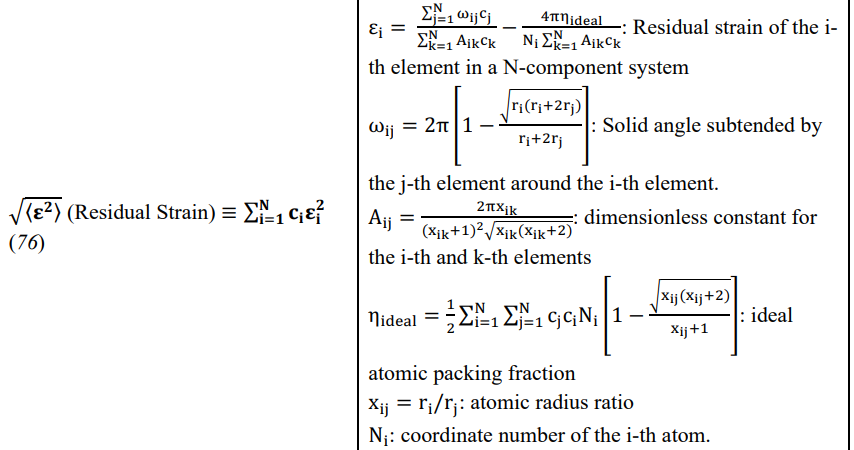

In [ ]:
def residual_strain(x,r,xtal='BCC'):

  if xtal == 'BCC':
    Ni = 8   # BCC coordination number

  elif xtal in ['FCC','HCP']:
    Ni = 12   # fcc and hcp coordination number

  else:
    # don't compute a value if there is not a valid structure
    return None


  # broadcast radii
  ri = r[:, None]    # (N,1)
  rj = r[None, :]    # (1,N)
  rk = r[None, :]    # (1,N)  # same as rj, just different role

  xi = x[:, None]    # (N,1)
  xj = x[None, :]    # (1,N)
  xk = x[None, :]    # (1,N)

  # ω_ij
  wij = 2*np.pi * (1 - np.sqrt(ri*(ri + 2*rj)) / (ri + 2*rj))   # (N,N)

  # ratios
  xij = ri / rj
  xik = ri / rk

  # A_ik
  Aik = 2*np.pi * xik / ((xik + 1.0)**2 * np.sqrt(xik*(xik+2.0)))   # (N,N)

  # f(x_ij)
  y = 1 - np.sqrt(xij*(xij+2)) / (xij+1)

  # ideal packing factor
  ideal_packing = 0.5 * np.sum(xi * xj * Ni* y)   # 0.5 avoids double-counting

  # residual strain ε_i (vector, length N)
  num = np.sum(wij * xj, axis=1)          # sum over j
  den = np.sum(Aik * xk, axis=1)          # sum over k
  epsi = num/den - (4*np.pi*ideal_packing)/(Ni*den)

  # ⟨ε²⟩
  res_strain = np.sum(x * epsi**2)

  return res_strain



els = ['Co','Fe','Ni']
x = np.array([0.333, 0.333, 0.333])   # fractions
r = rom.loc['Atomic radius (pm)', els].values

res = residual_strain(x,r,xtal='FCC')
print(res)

3.9996962678576016


In [ ]:
# apply radius deviation function to each row of comps using lambda row to access multiple values
comps['residual_strain'] = comps.apply(
    lambda row: residual_strain(
        row['composition'],
        rom.loc['Atomic radius (pm)', row['elements']].to_numpy()
    ),
    axis=1
)

comps[['elements', 'composition','residual_strain']].head()

,elements,composition,residual_strain
0,"[Mo, Nb, Ta, V, W]","[0.2, 0.2, 0.2, 0.2, 0.2]",3.998665
1,"[Mo, Nb, Ta, W]","[0.25, 0.25, 0.25, 0.25]",3.999282
2,"[Ta, V, W, Cr, Ti]","[0.2398081534772182, 0.2398081534772182, 0.239...",3.996422
3,"[Ta, V, W, Cr, Ti]","[0.2325581395348837, 0.2325581395348837, 0.232...",3.996251
4,"[Ta, V, W, Cr]","[0.25, 0.25, 0.25, 0.25]",3.996690


## Data analysis

In [ ]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 100
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mo                         86 non-null     float64
 1   Nb                         86 non-null     float64
 2   Ta                         86 non-null     float64
 3   V                          86 non-null     float64
 4   W                          86 non-null     float64
 5   Cr                         86 non-null     float64
 6   Ti                         86 non-null     float64
 7   Al                         86 non-null     float64
 8   Co                         86 non-null     float64
 9   Cu                         86 non-null     float64
 10  Fe                         86 non-null     float64
 11  Ni                         86 non-null     float64
 12  Re                         86 non-null     float64
 13  Hf                         86 non-null     float64
 14  

In [ ]:
comps['G/B']=comps['shear modulus V_AVG']/comps['bulk modulus V_AVG']

In [ ]:
dataset = exp.join(comps[comps.columns.difference(exp.columns)], how="inner")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 100
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  86 non-null     int64  
 1   composition                 86 non-null     object 
 2   phases                      41 non-null     object 
 3   hardness (HV)               37 non-null     float64
 4   temperature (C)             86 non-null     float64
 5   compressive ys (MPa)        48 non-null     float64
 6   compressive strength (MPa)  46 non-null     float64
 7   compressive strain (%)      55 non-null     float64
 8   doi                         86 non-null     object 
 9   ys (MPa)                    12 non-null     float64
 10  uts (MPa)                   13 non-null     float64
 11  elongation (%)              13 non-null     float64
 12  pmg_comp                    86 non-null     object 
 13  is_ductile                  68 non-null  

In [ ]:
dataset.to_csv('RT_W_ROM.csv')

# Other data (r_s, cleaning element data)

## Interstitial electron density



We can use the [Universal Maximum Strength of Solid Metals and Alloys](https://link.aps.org/accepted/10.1103/PhysRevLett.130.166101) metric derived from interstitial electron density as an optimization objective

In [ ]:
!unzip -q elements_data.zip

replace content/elements_data/W.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace content/elements_data/Y.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import os
import numpy as np
import pandas as pd
import json

jsons = os.listdir('/content/content/elements_data')
els = [os.path.splitext(x)[0] for x in jsons]
els[0:3]

['Rb', 'Nb', 'Cd']

In [ ]:
els.remove('.ipynb_checkpoints')

In [ ]:
BCC_properties = pd.DataFrame()

for el in els:
  with open(f'/content/content/elements_data/{el}.json') as f:
    data = json.load(f)

  # flatten nested JSON
  df = pd.json_normalize(data)
  try:

    # in the dataset, there are values for different crystal structures of an element -
    # - BCC is in the third position in the list after HCP and FCC

    BM = df[f'{el}.properties.bulk_modulus.values'][0][2]
    r_s = df[f'{el}.properties.r_s.values'][0][2]
    rho = df[f'{el}.properties.rho0_IEC.values'][0][2]

  except:
    print(f'{el} does not have BCC property, skipping')
    continue

  record = pd.DataFrame({el: [BM, r_s, rho]})
  BCC_properties = pd.concat([BCC_properties, record], axis=1)



Rb does not have BCC property, skipping
K does not have BCC property, skipping
Y does not have BCC property, skipping
Sc does not have BCC property, skipping


In [ ]:
BCC_properties.index = ['Bulk Modulus', 'r_s', 'rho']
BCC_properties

,Nb,Cd,Li,Ru,Ni,Cu,Mg,Sr,Na,W,...,Re,Os,Ca,V,Be,Ta,Zn,Cr,Rh,Ba
Bulk Modulus,156.60000,61.1000,14.500,319.9000,229.2000,162.6000,38.000,12.5000,8.1000,271.9000,...,350.7000,448.3000,16.5000,194.4000,125.2000,179.90000,87.7000,264.1000,278.1000,8.1000
r_s,1.92295,2.3148,3.101,1.7690,1.8015,1.9112,2.574,3.3164,3.7561,1.7416,...,1.6863,1.6732,3.0867,1.8439,1.8382,1.85795,2.0695,1.7325,1.8296,3.4412
rho,0.03360,0.0193,0.008,0.0431,0.0408,0.0342,0.014,0.0066,0.0045,0.0452,...,0.0498,0.0510,0.0081,0.0381,0.0384,0.03720,0.0269,0.0459,0.0390,0.0059


In [ ]:
BCC_properties.to_csv('UMS_BCC.csv')

### data entry

In [ ]:
import os
import json

# Folder to hold element JSON files
SAVE_DIR = "elements_data"
#os.makedirs(SAVE_DIR, exist_ok=True)

ALLOWED_STRUCTURES = ["HCP", "FCC", "BCC", "TET", "ORC", "OTHER"]

def _maybe_float(x: str):
    x = x.strip()
    if x == "" or x.lower() == "na":
        return None
    try:
        return float(x)
    except ValueError:
        return None

def _parse_number_or_list(s: str):
    vals = [v for v in s.split(",")]
    out = []
    for v in vals:
        f = _maybe_float(v)
        if f is not None:
            out.append(f)
    return out

def prompt_element():
    name = input("Element name (top-level key, e.g., Li): ").strip()
    if not name:
        print("Name required.")
        return None, None

    Z = _maybe_float(input("Atomic number Z (e.g., 3): "))
    group_vec = _maybe_float(input("group [VEC] (valence electron count): "))
    ia1 = _maybe_float(input("IA [1] (first ionization energy): "))

    cs = input(f"Crystal structure {ALLOWED_STRUCTURES} (e.g., BCC): ").strip().upper()
    if cs not in ALLOWED_STRUCTURES:
        cs = "OTHER"

    bm_vals = _parse_number_or_list(input("Bulk modulus [GPa] (comma-separated OK): "))
    rs_vals = _parse_number_or_list(input("r_s [a.u.] (comma-separated OK): "))
    rho_vals = _parse_number_or_list(input("rho0^{IEC} (comma-separated OK): "))

    notes = input("Optional notes / provenance tags (comma-separated): ").strip()
    tags = [t.strip() for t in notes.split(",")] if notes else []

    rec = {
        "identity": {
            "atomic_number": Z,
            "group_VEC": group_vec,
            "IA_1": ia1,
        },
        "structure": {
            "crystal": cs
        },
        "properties": {
            "bulk_modulus": {
                "values": bm_vals, "units": "GPa"
            },
            "r_s": {
                "values": rs_vals, "units": "a.u."
            },
            "rho0_IEC": {
                "values": rho_vals, "units": "—"
            }
        },
        "tags": tags
    }
    return name, rec

def main():
    while True:
        print("\n--- New element ---")
        name, rec = prompt_element()
        if name:
            # Save as its own JSON file
            file_path = os.path.join(SAVE_DIR, f"{name}.json")
            with open(file_path, "w") as f:
                json.dump({name: rec}, f, indent=2)
            print(f"Saved {name} → {file_path}")

        cont = input("Add another? (y/n): ").strip().lower()
        if cont != "y":
            break

if __name__ == "__main__":
    main()



--- New element ---
Element name (top-level key, e.g., Li): HF
Atomic number Z (e.g., 3): 
group [VEC] (valence electron count): 
IA [1] (first ionization energy): 
Crystal structure ['HCP', 'FCC', 'BCC', 'TET', 'ORC', 'OTHER'] (e.g., BCC): 
Bulk modulus [GPa] (comma-separated OK): 
r_s [a.u.] (comma-separated OK): 
rho0^{IEC} (comma-separated OK): 
Optional notes / provenance tags (comma-separated): 
Saved HF → elements_data/HF.json
Add another? (y/n): y

--- New element ---
Element name (top-level key, e.g., Li): Hf
Atomic number Z (e.g., 3): 72
group [VEC] (valence electron count): 4
IA [1] (first ionization energy): 
Crystal structure ['HCP', 'FCC', 'BCC', 'TET', 'ORC', 'OTHER'] (e.g., BCC): HCP
Bulk modulus [GPa] (comma-separated OK): 107.5,90.7,97
r_s [a.u.] (comma-separated OK): 2.075,2.076,2.066
rho0^{IEC} (comma-separated OK): 0.0267,0.0267,0.0271
Optional notes / provenance tags (comma-separated): 
Saved Hf → elements_data/Hf.json
Add another? (y/n): y

--- New element ---
E

In [ ]:
!zip -r /content/elements_data.zip /content/elements_data

  adding: content/elements_data/ (stored 0%)
  adding: content/elements_data/W.json (deflated 60%)
  adding: content/elements_data/Y.json (deflated 60%)
  adding: content/elements_data/Zn.json (deflated 60%)
  adding: content/elements_data/Rh.json (deflated 60%)
  adding: content/elements_data/Co.json (deflated 60%)
  adding: content/elements_data/Ru.json (deflated 60%)
  adding: content/elements_data/Na.json (deflated 62%)
  adding: content/elements_data/Ba.json (deflated 60%)
  adding: content/elements_data/Ag.json (deflated 60%)
  adding: content/elements_data/Cr.json (deflated 60%)
  adding: content/elements_data/Zr.json (deflated 60%)
  adding: content/elements_data/Tl.json (deflated 60%)
  adding: content/elements_data/Au.json (deflated 60%)
  adding: content/elements_data/Be.json (deflated 61%)
  adding: content/elements_data/Sr.json (deflated 60%)
  adding: content/elements_data/Os.json (deflated 60%)
  adding: content/elements_data/Mg.json (deflated 61%)
  adding: content/elem

## Elemental values

In [ ]:
rom = pd.read_csv('/content/element_data.csv',index_col=0)
BCC = pd.read_csv('/content/UMS_BCC.csv',index_col=0)

In [ ]:
total = pd.concat([BCC, rom[list(BCC.columns)]])

In [ ]:
total.head()

,Nb,Cd,Li,Ru,Ni,Cu,Mg,Sr,Na,W,...,Re,Os,Ca,V,Be,Ta,Zn,Cr,Rh,Ba
BCC Bulk Modulus,156.60000,61.1000,14.500,319.9000,229.2000,162.6000,38.000,12.5000,8.1000,271.9000,...,350.7000,448.3000,16.5000,194.4000,125.2000,179.90000,87.7000,264.1000,278.1000,8.1000
r_s,1.92295,2.3148,3.101,1.7690,1.8015,1.9112,2.574,3.3164,3.7561,1.7416,...,1.6863,1.6732,3.0867,1.8439,1.8382,1.85795,2.0695,1.7325,1.8296,3.4412
rho,0.03360,0.0193,0.008,0.0431,0.0408,0.0342,0.014,0.0066,0.0045,0.0452,...,0.0498,0.0510,0.0081,0.0381,0.0384,0.03720,0.0269,0.0459,0.0390,0.0059
Atomic number,41.00000,48.0000,3.000,44.0000,28.0000,29.0000,12.000,38.0000,11.0000,74.0000,...,75.0000,76.0000,20.0000,23.0000,4.0000,73.00000,30.0000,24.0000,45.0000,56.0000
Atomic radius (pm),142.90000,165.9000,151.940,134.5000,124.5900,127.8000,160.130,215.2000,185.7000,136.7000,...,137.5000,135.2300,197.6000,131.6000,112.8000,143.00000,139.4500,124.9100,137.5400,217.6000


In [ ]:
shear = pd.read_csv('/content/elemental_mechanical_properties.csv')
# https://periodictable.com/Properties/A/ShearModulus.an.html
shear.head()

,element,shear modulus,Atomic number,poissons ratio,youngs modulus,bulk modulus
0,Hydrogen,NaN,1,NaN,NaN,NaN
1,Helium,NaN,2,NaN,NaN,NaN
2,Lithium,4.2 GPa,3,NaN,4.9 GPa,11 GPa
3,Beryllium,132 GPa,4,0.032,287 GPa,130 GPa
4,Boron,NaN,5,NaN,NaN,320 GPa


In [ ]:
total = total.transpose()
total.head()

,BCC Bulk Modulus,r_s,rho,Atomic number,Atomic radius (pm),Melting point (K),Boiling point (K),Pauling electronegativity (-),Allen electronegativity (-),Valence electron concentration (-),Itinerant electrons per atom (-),Atomic weight (g/mol),Density (g/cm3),Molar heat capacity (J/mol K),Thermal conductivity (W/m/K)
Nb,156.6,1.92295,0.0336,41.0,142.90,2750.0,5017.0,1.60,1.41,5.0,1.0,92.91,8.58,24.60,53.7
Cd,61.1,2.31480,0.0193,48.0,165.90,430.0,1040.0,1.78,1.52,3.0,0.0,112.41,7.29,26.02,97.0
Li,14.5,3.10100,0.0080,3.0,151.94,454.0,1615.0,0.98,0.91,1.0,0.0,6.94,0.53,24.86,84.7
Ru,319.9,1.76900,0.0431,44.0,134.50,2237.0,4423.0,2.28,1.54,9.0,0.0,101.07,12.43,24.06,120.0
Ni,229.2,1.80150,0.0408,28.0,124.59,1728.0,3186.0,1.91,1.88,10.0,2.0,58.69,8.91,26.07,90.7


In [ ]:
all = total.merge(shear,on='Atomic number',how="left").set_index(total.index)
all.head()

,BCC Bulk Modulus,r_s,rho,Atomic number,Atomic radius (pm),Melting point (K),Boiling point (K),Pauling electronegativity (-),Allen electronegativity (-),Valence electron concentration (-),Itinerant electrons per atom (-),Atomic weight (g/mol),Density (g/cm3),Molar heat capacity (J/mol K),Thermal conductivity (W/m/K),element,shear modulus,poissons ratio,youngs modulus,bulk modulus
Nb,156.6,1.92295,0.0336,41.0,142.90,2750.0,5017.0,1.60,1.41,5.0,1.0,92.91,8.58,24.60,53.7,Niobium,38 GPa,0.40,105 GPa,170 GPa
Cd,61.1,2.31480,0.0193,48.0,165.90,430.0,1040.0,1.78,1.52,3.0,0.0,112.41,7.29,26.02,97.0,Cadmium,19 GPa,0.30,50 GPa,42 GPa
Li,14.5,3.10100,0.0080,3.0,151.94,454.0,1615.0,0.98,0.91,1.0,0.0,6.94,0.53,24.86,84.7,Lithium,4.2 GPa,NaN,4.9 GPa,11 GPa
Ru,319.9,1.76900,0.0431,44.0,134.50,2237.0,4423.0,2.28,1.54,9.0,0.0,101.07,12.43,24.06,120.0,Ruthenium,173 GPa,0.30,447 GPa,220 GPa
Ni,229.2,1.80150,0.0408,28.0,124.59,1728.0,3186.0,1.91,1.88,10.0,2.0,58.69,8.91,26.07,90.7,Nickel,76 GPa,0.31,200 GPa,180 GPa


In [ ]:
all['shear modulus']=all['shear modulus'].str.replace(r"\s*GPa", "", regex=True).astype(float)
all['bulk modulus']=all['bulk modulus'].str.replace(r"\s*GPa", "", regex=True).astype(float)
all['youngs modulus']=all['youngs modulus'].str.replace(r"\s*GPa", "", regex=True).astype(float)

In [ ]:
all.head()

,BCC Bulk Modulus,r_s,rho,Atomic number,Atomic radius (pm),Melting point (K),Boiling point (K),Pauling electronegativity (-),Allen electronegativity (-),Valence electron concentration (-),Itinerant electrons per atom (-),Atomic weight (g/mol),Density (g/cm3),Molar heat capacity (J/mol K),Thermal conductivity (W/m/K),element,shear modulus,poissons ratio,youngs modulus,bulk modulus
Nb,156.6,1.92295,0.0336,41.0,142.90,2750.0,5017.0,1.60,1.41,5.0,1.0,92.91,8.58,24.60,53.7,Niobium,38.0,0.40,105.0,170.0
Cd,61.1,2.31480,0.0193,48.0,165.90,430.0,1040.0,1.78,1.52,3.0,0.0,112.41,7.29,26.02,97.0,Cadmium,19.0,0.30,50.0,42.0
Li,14.5,3.10100,0.0080,3.0,151.94,454.0,1615.0,0.98,0.91,1.0,0.0,6.94,0.53,24.86,84.7,Lithium,4.2,NaN,4.9,11.0
Ru,319.9,1.76900,0.0431,44.0,134.50,2237.0,4423.0,2.28,1.54,9.0,0.0,101.07,12.43,24.06,120.0,Ruthenium,173.0,0.30,447.0,220.0
Ni,229.2,1.80150,0.0408,28.0,124.59,1728.0,3186.0,1.91,1.88,10.0,2.0,58.69,8.91,26.07,90.7,Nickel,76.0,0.31,200.0,180.0


In [ ]:
all=all.transpose()
all.head()

,Nb,Cd,Li,Ru,Ni,Cu,Mg,Sr,Na,W,...,Re,Os,Ca,V,Be,Ta,Zn,Cr,Rh,Ba
BCC Bulk Modulus,156.6,61.1,14.5,319.9,229.2,162.6,38.0,12.5,8.1,271.9,...,350.7,448.3,16.5,194.4,125.2,179.9,87.7,264.1,278.1,8.1
r_s,1.92295,2.3148,3.101,1.769,1.8015,1.9112,2.574,3.3164,3.7561,1.7416,...,1.6863,1.6732,3.0867,1.8439,1.8382,1.85795,2.0695,1.7325,1.8296,3.4412
rho,0.0336,0.0193,0.008,0.0431,0.0408,0.0342,0.014,0.0066,0.0045,0.0452,...,0.0498,0.051,0.0081,0.0381,0.0384,0.0372,0.0269,0.0459,0.039,0.0059
Atomic number,41.0,48.0,3.0,44.0,28.0,29.0,12.0,38.0,11.0,74.0,...,75.0,76.0,20.0,23.0,4.0,73.0,30.0,24.0,45.0,56.0
Atomic radius (pm),142.9,165.9,151.94,134.5,124.59,127.8,160.13,215.2,185.7,136.7,...,137.5,135.23,197.6,131.6,112.8,143.0,139.45,124.91,137.54,217.6


In [ ]:
all.loc[:, all.isna().any()]

,Li,Sr,Na,Zr,Mn,Os,Ba
BCC Bulk Modulus,14.5,12.5,8.1,87.6,292.6,448.3,8.1
r_s,3.101,3.3164,3.7561,2.151,1.7013,1.6732,3.4412
rho,0.008,0.0066,0.0045,0.024,0.0485,0.051,0.0059
Atomic number,3.0,38.0,11.0,40.0,25.0,76.0,56.0
Atomic radius (pm),151.94,215.2,185.7,160.25,135.0,135.23,217.6
Melting point (K),454.0,1050.0,371.0,2128.0,1519.0,3306.0,1000.0
Boiling point (K),1615.0,1655.0,1156.0,4682.0,2334.0,5285.0,2143.0
Pauling electronegativity (-),0.98,0.95,0.93,1.33,1.55,2.2,0.89
Allen electronegativity (-),0.91,0.96,0.87,1.32,1.75,1.65,0.88
Valence electron concentration (-),1.0,2.0,1.0,4.0,7.0,8.0,2.0


In [ ]:
all.to_csv('/content/total_rom_dataset.csv')